# Initialization

In [21]:
import pandas as pd
#pd.set_option('display.max_columns', None)
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm
%matplotlib inline

In [22]:
train = pd.read_csv('../input/bike-share-demand/train.csv')
test = pd.read_csv('../input/bike-share-demand/test.csv')

train_original = pd.read_csv('../input/bike-share-demand/train.csv')
test_original = pd.read_csv('../input/bike-share-demand/test.csv')
#train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = pd.DatetimeIndex(train['datetime']).year
test['year'] = pd.DatetimeIndex(test['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
test['month'] = pd.DatetimeIndex(test['datetime']).month
train['date'] = pd.DatetimeIndex(train['datetime']).day
test['date'] = pd.DatetimeIndex(test['datetime']).day
train['day'] = pd.DatetimeIndex(train['datetime']).weekday
test['day'] = pd.DatetimeIndex(test['datetime']).weekday
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
test['hour'] = pd.DatetimeIndex(test['datetime']).hour
train = train.drop(columns = ['casual', 'registered', 'cnt'])
train['cnt'] = train_original['cnt']
test['cnt'] = list(np.repeat([100], test.shape[0]))

In [23]:
train.sample(5)

,datetime,season,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,year,month,date,day,hour,cnt
3433,2011-08-12 23:00:00,3,0,5,1,1,0.68,0.6364,0.51,0.0000,2011,8,12,4,23,151
4404,2011-10-15 13:00:00,4,0,6,0,1,0.60,0.6212,0.35,0.4627,2011,10,15,5,13,394
6069,2012-02-09 03:00:00,1,0,4,1,1,0.22,0.2121,0.80,0.2836,2012,2,9,3,3,4
1208,2011-03-15 02:00:00,1,0,2,1,1,0.30,0.3030,0.62,0.0896,2011,3,15,1,2,3
1034,2011-03-07 15:00:00,1,0,1,1,1,0.34,0.3030,0.31,0.3881,2011,3,7,0,15,96


In [24]:
test.head()

,datetime,season,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,year,month,date,day,hour,cnt
0,2011-01-20 00:00:00,1,0,4,1,1,0.26,0.2273,0.56,0.3881,2011,1,20,3,0,100
1,2011-01-20 01:00:00,1,0,4,1,1,0.26,0.2727,0.56,0.0000,2011,1,20,3,1,100
2,2011-01-20 02:00:00,1,0,4,1,1,0.26,0.2727,0.56,0.0000,2011,1,20,3,2,100
3,2011-01-20 03:00:00,1,0,4,1,1,0.26,0.2576,0.56,0.1642,2011,1,20,3,3,100
4,2011-01-20 04:00:00,1,0,4,1,1,0.26,0.2576,0.56,0.1642,2011,1,20,3,4,100


In [25]:
data = pd.concat([train.reset_index(drop = True),
                  test.reset_index(drop = True)],
                 axis = 0)
data = data.sort_values(by = 'datetime')
data = data.reset_index(drop = True)

Text(0.5, 1.0, 'The Bike Sharing Demand Prediction Task')

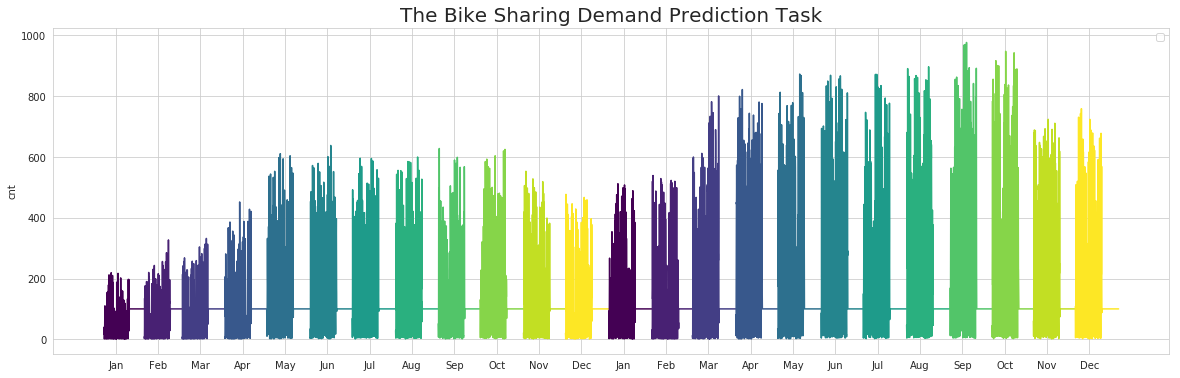

In [26]:
sns.set_style('whitegrid')
fig = plt.figure(figsize = [20, 6])
ax1 = fig.add_subplot(1,1,1)
sns.lineplot(data = data[data['year'] == 2011],
                   y = 'cnt',
                   x = data[data['year'] == 2011].index,
                   hue = 'month',
                   palette = 'viridis')
sns.lineplot(data = data[data['year'] == 2012],
                   y = 'cnt',
                   x = data[data['year'] == 2012].index,
                   hue = 'month',
                   palette = 'viridis')
ax1.set_xticks(np.arange(200, 725*24, 725))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']*2)
#ax1.set_title('Monthly Segmentation of  Count')
ax1.legend([])
plt.title('The Bike Sharing Demand Prediction Task',
          size = 20)

In [27]:
"""x_train = train.iloc[:, :-3]
y_train = train.iloc[:, -1]

sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 2, squeeze = False, figsize = (20, 10))
#plt.figure(figsize = [10, 5])
ax1 = sns.distplot(x_train.temp, ax = ax[0,0], color = 'm', label = "Skewness : %.2f"%x_train.temp.skew())
ax1.set_title('Distribution Plot of Temperature')
ax1 = ax1.legend(loc = "best")
#ax1.text(.6, 3.1, s = [skew, str(1)])
# ('skew', str(x_train.temp.skew()))
ax2 = sns.distplot(x_train.atemp, color = 'g', ax = ax[0,1], label = "Skewness : %.2f"%x_train.atemp.skew())
ax2.set_title('Distribution Plot of Atempt')
ax2 = ax2.legend(loc = "best")

ax3 = sns.distplot(x_train.humidity, ax = ax[1,0], label = "Skewness : %.2f"%x_train.humidity.skew())
ax3.set_title('Distribution Plot of Humidity')
ax3 = ax3.legend(loc = "best")

ax4 = sns.distplot(x_train.windspeed, ax = ax[1,1], color = 'y', label = "Skewness : %.2f"%x_train.windspeed.skew())
ax4.set_title('Distribution Plot of Windspeed')
ax4 = ax4.legend(loc = "best")"""


'x_train = train.iloc[:, :-3]\ny_train = train.iloc[:, -1]\n\nsns.set_style(\'darkgrid\')\nfig, ax = plt.subplots(2, 2, squeeze = False, figsize = (20, 10))\n#plt.figure(figsize = [10, 5])\nax1 = sns.distplot(x_train.temp, ax = ax[0,0], color = \'m\', label = "Skewness : %.2f"%x_train.temp.skew())\nax1.set_title(\'Distribution Plot of Temperature\')\nax1 = ax1.legend(loc = "best")\n#ax1.text(.6, 3.1, s = [skew, str(1)])\n# (\'skew\', str(x_train.temp.skew()))\nax2 = sns.distplot(x_train.atemp, color = \'g\', ax = ax[0,1], label = "Skewness : %.2f"%x_train.atemp.skew())\nax2.set_title(\'Distribution Plot of Atempt\')\nax2 = ax2.legend(loc = "best")\n\nax3 = sns.distplot(x_train.humidity, ax = ax[1,0], label = "Skewness : %.2f"%x_train.humidity.skew())\nax3.set_title(\'Distribution Plot of Humidity\')\nax3 = ax3.legend(loc = "best")\n\nax4 = sns.distplot(x_train.windspeed, ax = ax[1,1], color = \'y\', label = "Skewness : %.2f"%x_train.windspeed.skew())\nax4.set_title(\'Distribution Plot 

# EXPLORATORY DATA ANALYSIS

Text(0.5, 1.0, 'Violin Plot of Continuous Features')

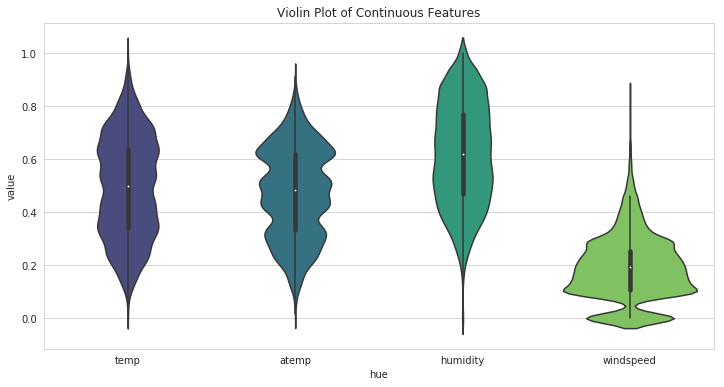

In [28]:
sns.set_style('whitegrid')
vis_df = pd.DataFrame({'value' : list(train['temp']) + 
                       list(train['atemp']) + 
                       list(train['humidity']) + 
                       list(train['windspeed']),
                       'hue' : list(np.repeat('temp', train.shape[0])) + 
                       list(np.repeat('atemp', train.shape[0])) + 
                       list(np.repeat('humidity', train.shape[0])) + 
                       list(np.repeat('windspeed', train.shape[0]))})

plt.figure(figsize = [12, 6])
sns.violinplot(data = vis_df,
               y = 'value',
               x = 'hue',
               palette = 'viridis')
plt.title('Violin Plot of Continuous Features')

These are the distributions of each numerical features. Windspeed has different distributions compared to the other fetures.

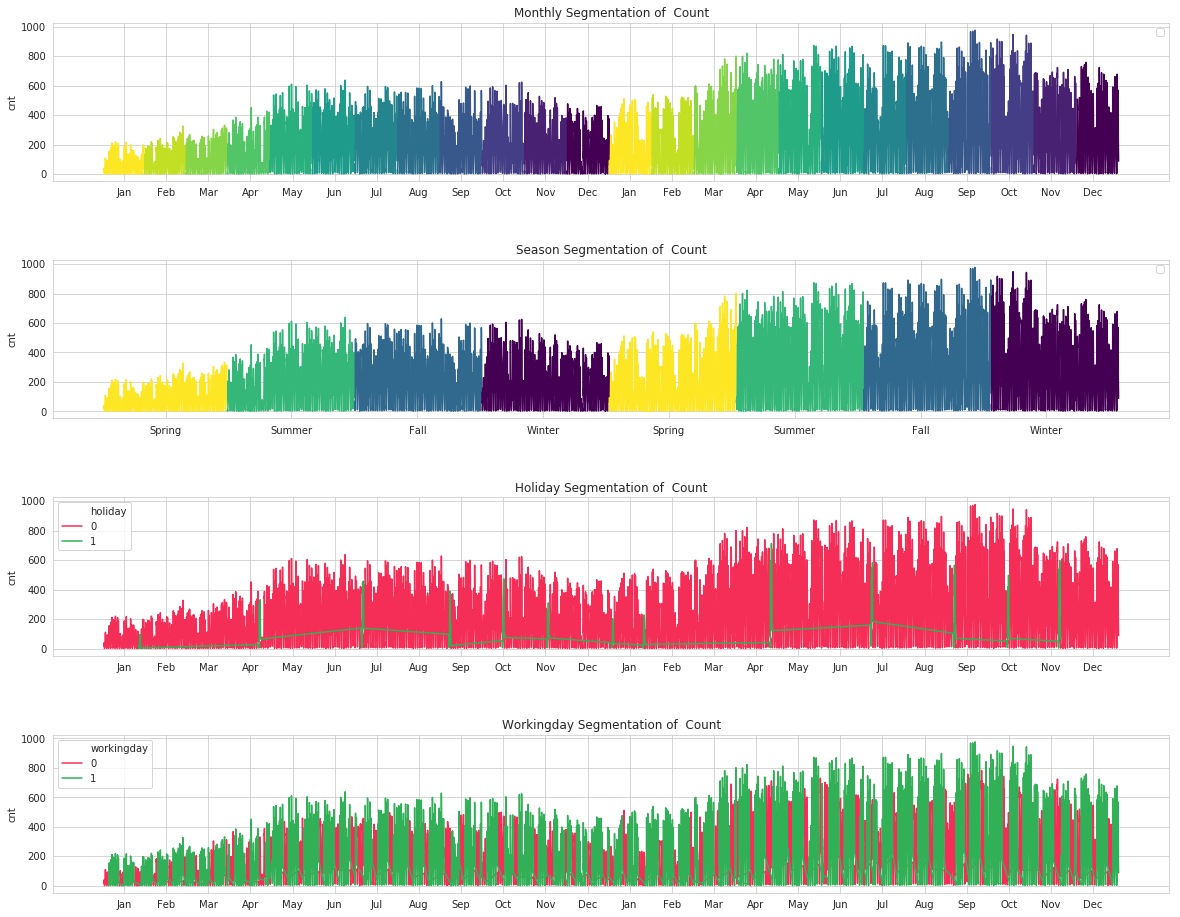

In [29]:
fig = plt.figure(figsize = [20, 16])
ax1 = fig.add_subplot(4, 1, 1)
sns.set_style('whitegrid')
sns.lineplot(data = train[train['year'] == 2011],
             y = 'cnt',
             x = train[train['year'] == 2011].index,
             hue = 'month',
             palette = 'viridis_r')
sns.lineplot(data = train[train['year'] == 2012],
             y = 'cnt',
             x = train[train['year'] == 2012].index,
             hue = 'month',
             palette = 'viridis_r')
ax1.set_xticks(np.arange(215, 452*24, 452))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']*2)
ax1.set_title('Monthly Segmentation of  Count')
ax1.legend([])

ax2 = fig.add_subplot(4, 1, 2)
sns.lineplot(data = train[train['year'] == 2011],
             y = 'cnt',
             x = train[train['year'] == 2011].index,
             hue = 'season',
             palette = 'viridis_r')
sns.lineplot(data = train[train['year'] == 2012],
             y = 'cnt',
             x = train[train['year'] == 2012].index,
             hue = 'season',
             palette = 'viridis_r')
ax2.set_xticks(np.arange(661, 1350*8, 1350))
ax2.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter']*2)
ax2.set_title('Season Segmentation of  Count')
ax2.legend([])

ax3 = fig.add_subplot(4, 1, 3)
sns.lineplot(data = train,
             y = 'cnt',
             x = train.index,
             hue = 'holiday',
             palette = ['#F42E56', '#31B057'])
ax3.set_xticks(np.arange(215, 452*24, 452))
ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']*2)
ax3.set_title('Holiday Segmentation of  Count')

ax4 = fig.add_subplot(4, 1, 4)
sns.lineplot(data = train,
             y = 'cnt',
             x = train.index,
             hue = 'workingday',
             palette = ['#F42E56', '#31B057'])
ax4.set_xticks(np.arange(215, 452*24, 452))
ax4.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']*2)
ax4.set_title('Workingday Segmentation of  Count')
plt.subplots_adjust(hspace = .5)

- Number of bikes rented in 2012 was higher than in 2011
- In spring, people tend to rent less bikes than in other seasons. This may be caused by the lower temperature
- "Holiday" feature will not be used in the modeling section because its values are not balancedly distributed

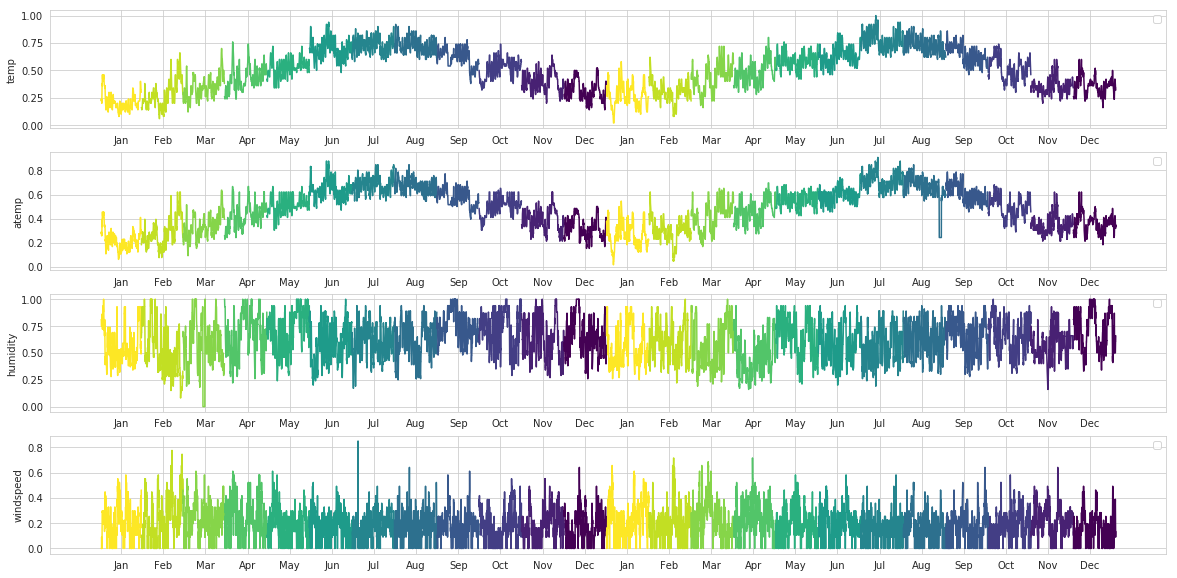

In [30]:
fig = plt.figure(figsize = [20, 10])
ax1 = fig.add_subplot(4, 1, 1)
sns.set_style('whitegrid')
sns.lineplot(data = train[train['year'] == 2011],
             y = 'temp',
             x = train[train['year'] == 2011].index,
             hue = 'month',
             palette = 'viridis_r')
sns.lineplot(data = train[train['year'] == 2012],
             y = 'temp',
             x = train[train['year'] == 2012].index,
             hue = 'month',
             palette = 'viridis_r')
ax1.set_xticks(np.arange(215, 452*24, 452))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']*2)
ax1.legend([])

ax2 = fig.add_subplot(4, 1, 2)
sns.lineplot(data = train[train['year'] == 2011],
             y = 'atemp',
             x = train[train['year'] == 2011].index,
             hue = 'month',
             palette = 'viridis_r')
sns.lineplot(data = train[train['year'] == 2012],
             y = 'atemp',
             x = train[train['year'] == 2012].index,
             hue = 'month',
             palette = 'viridis_r')
ax2.set_xticks(np.arange(215, 452*24, 452))
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']*2)
ax2.legend([])

ax3 = fig.add_subplot(4, 1, 3)
sns.lineplot(data = train[train['year'] == 2011],
             y = 'humidity',
             x = train[train['year'] == 2011].index,
             hue = 'month',
             palette = 'viridis_r')
sns.lineplot(data = train[train['year'] == 2012],
             y = 'humidity',
             x = train[train['year'] == 2012].index,
             hue = 'month',
             palette = 'viridis_r')
ax3.set_xticks(np.arange(215, 452*24, 452))
ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']*2)
ax3.legend([])

ax4 = fig.add_subplot(4, 1, 4)
sns.lineplot(data = train[train['year'] == 2011],
             y = 'windspeed',
             x = train[train['year'] == 2011].index,
             hue = 'month',
             palette = 'viridis_r')
sns.lineplot(data = train[train['year'] == 2012],
             y = 'windspeed',
             x = train[train['year'] == 2012].index,
             hue = 'month',
             palette = 'viridis_r')
ax4.set_xticks(np.arange(215, 452*24, 452))
ax4.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']*2)
ax4.legend([])

Weather conditions across the years

100%|██████████| 4/4 [00:11<00:00,  2.66s/it]


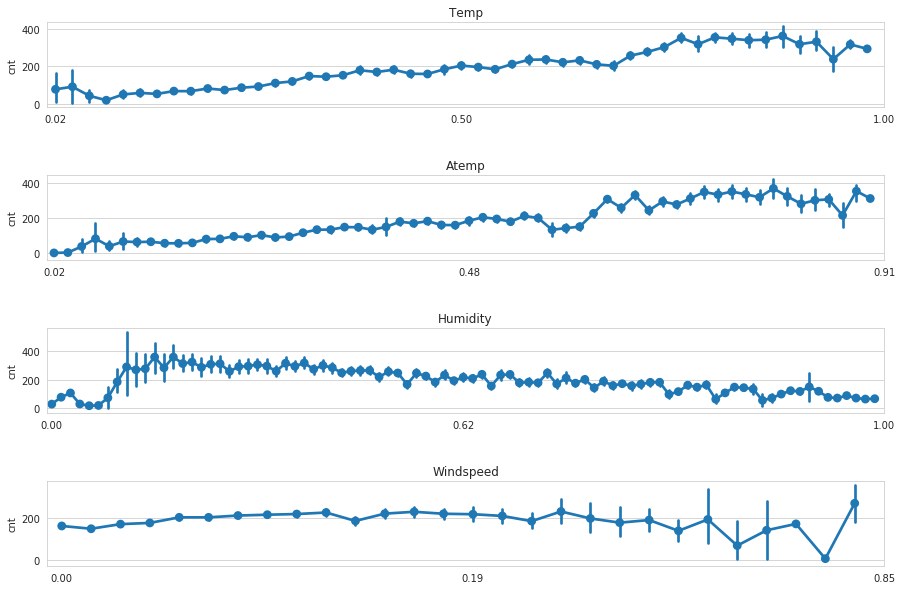

In [31]:
fig = plt.figure(figsize = [15, 10])
sns.set_style('whitegrid')
i = 1
for feature in tqdm(['temp', 'atemp', 'humidity', 'windspeed']) :
    ax = fig.add_subplot(4, 1, i)
    sns.pointplot(data = train,
                  y = 'cnt',
                  x = feature)
    #ax.set_xticks([])
    ax.set_xticks([0, len(train[feature].unique())//2, len(train[feature].unique())])
    ax.set_xticklabels(['%.2f'%train[feature].min(), '%.2f'%train[feature].median(), '%.2f'%train[feature].max()])
    
    ax.set_title(feature.capitalize())
    ax.set_xlabel('')
    plt.subplots_adjust(hspace = .8)
    i += 1

- People tend to rent more bikes at higher temperature
- People tend to rent more bikes at lower humidity
- Windspeed does not really affect people to rent bikes

WEATHER FEATURE

100%|██████████| 12/12 [00:00<00:00, 44.83it/s]


Text(0.5, 1.0, 'Number of Bikes Rented in 2012')

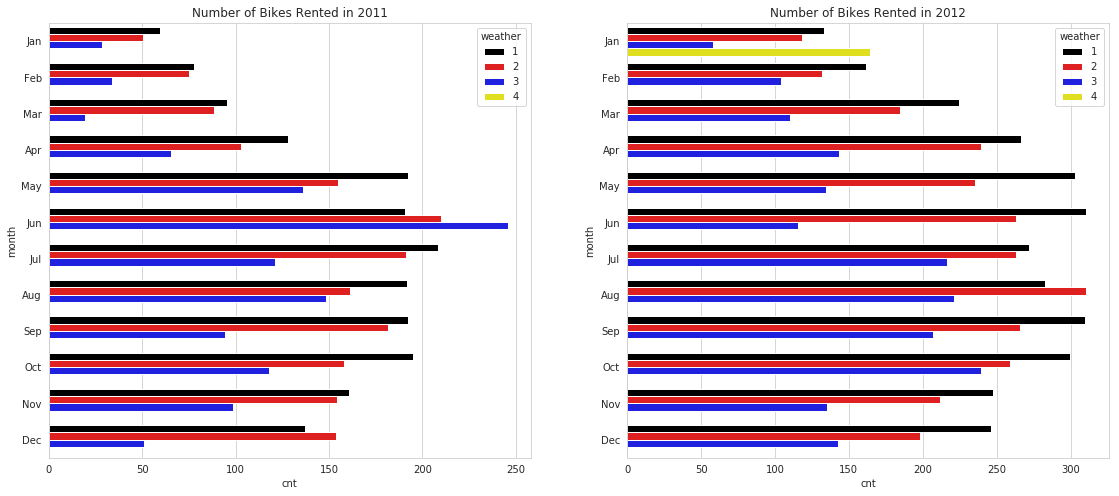

In [32]:
num_bikes = []
months = []
weathers = []
years = []
month_dict = {1 : 'Jan',
              2 : 'Feb',
              3 : 'Mar',
              4 : 'Apr',
              5 : 'May', 
              6 : 'Jun',
              7 : 'Jul',
              8 : 'Aug',
              9 : 'Sep',
              10 : 'Oct',
              11 : 'Nov',
              12 : 'Dec'}
for month in tqdm(train['month'].unique()) :
    for weather in train['weather'].unique() :
        for year in [2011, 2012] :
            years.append(year)
            weathers.append(weather)
            months.append(month_dict[month])
            num_bikes.append(train[(train['year'] == year) & (train['month'] == month) & (train['weather'] == weather)]['cnt'].mean())
vis_df = pd.DataFrame({'month' : months,
                            'weather' : weathers,
                            'cnt' : num_bikes,
                            'year' : years})
vis_df['weather'] = vis_df['weather'].astype('str')
#vis_df_2011['month'] = vis_df_2011['month'].astype('str')
fig = plt.figure(figsize = [19, 8])
ax = fig.add_subplot(1, 2, 1)
sns.set_style('whitegrid')
sns.barplot(data = vis_df[vis_df['year'] == 2011],
            x = 'cnt',
            y = 'month',
            hue = 'weather',
            palette = ['black', 'red', 'blue', 'yellow'])
ax.set_title('Number of Bikes Rented in 2011')
ax = fig.add_subplot(1, 2, 2)
sns.set_style('whitegrid')
sns.barplot(data = vis_df[vis_df['year'] == 2012],
            x = 'cnt',
            y = 'month',
            hue = 'weather',
            palette = ['black', 'red', 'blue', 'yellow'])
ax.set_title('Number of Bikes Rented in 2012')
#plt.title

In [33]:
train[(train['month'] == 1) & (train['year'] == 2012) & (train['weather'] == 4)]

,datetime,season,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,year,month,date,day,hour,cnt
5631,2012-01-09 18:00:00,1,0,1,1,4,0.2,0.2273,0.86,0.0896,2012,1,9,0,18,164


From the plots shown above, it can be seen that the majority of bikes were rented when the weather was clear (1) followed by cloudy weather (2), light snow/rain weather (3), and bad weather (4). There are some exceptions/anomalies like for example in January 2012 the average of bikes rented when the weather was bad is 164. This anomaly is caused by an observation on January 1, 2012 at 6 pm where the amount of bikes rented reached 164 bikes.

Text(0.5, 1.0, 'Average Number of Bikes Rented in 2012 at each hour')

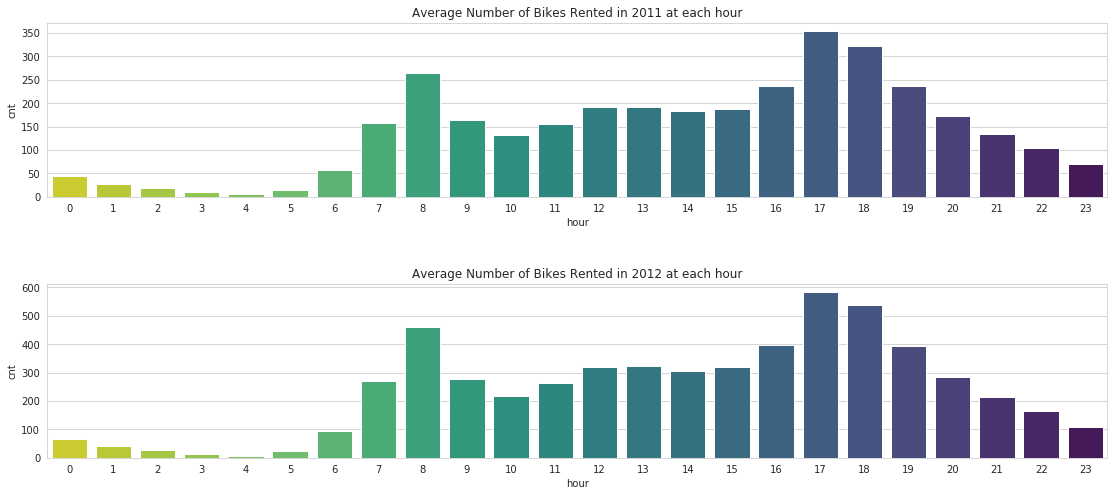

In [34]:
fig = plt.figure(figsize = [19, 8])
ax = fig.add_subplot(2, 1, 1)
sns.barplot(data = train[train['year'] == 2011].groupby('hour').mean(),
            y = 'cnt',
            x = train.groupby('hour').mean().index.astype('category'),
            palette = 'viridis_r')
ax.set_title('Average Number of Bikes Rented in 2011 at each hour')
plt.subplots_adjust(hspace = .5)

ax = fig.add_subplot(2, 1, 2)
sns.barplot(data = train[train['year'] == 2012].groupby('hour').mean(),
            y = 'cnt',
            x = train.groupby('hour').mean().index.astype('category'),
            palette = 'viridis_r')
ax.set_title('Average Number of Bikes Rented in 2012 at each hour')

People's behaviour when renting bikes is basically the same between 2011 and 2012. The peaks of bikes rented are probably when people go to work/school (around 8 am) and when they go home (around 5 to 7 pm). 
It's interesting to see if seasons affect people to rent bikes at particular time. The next plots will do the job.

Text(0.5, 1.0, 'Average Number of Bikes Rented in Winter at Each Hour')

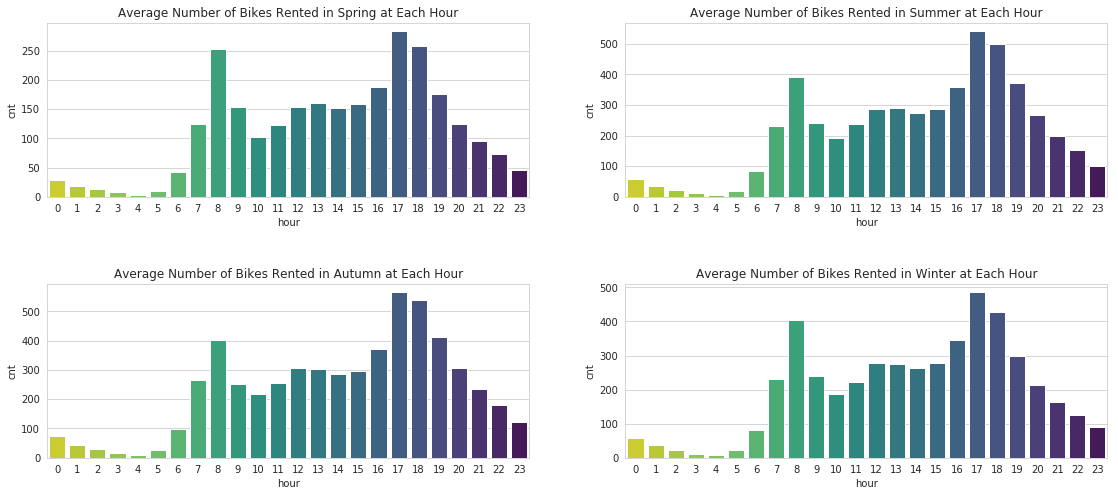

In [35]:
fig = plt.figure(figsize = [19, 8])
ax = fig.add_subplot(2, 2, 1)
sns.barplot(data = train[train['season'] == 1].groupby('hour').mean(),
            y = 'cnt',
            x = train.groupby('hour').mean().index.astype('category'),
            palette = 'viridis_r')
ax.set_title('Average Number of Bikes Rented in Spring at Each Hour')
plt.subplots_adjust(hspace = .5)

ax = fig.add_subplot(2, 2, 2)
sns.barplot(data = train[train['season'] == 2].groupby('hour').mean(),
            y = 'cnt',
            x = train.groupby('hour').mean().index.astype('category'),
            palette = 'viridis_r')
ax.set_title('Average Number of Bikes Rented in Summer at Each Hour')

ax = fig.add_subplot(2, 2, 3)
sns.barplot(data = train[train['season'] == 3].groupby('hour').mean(),
            y = 'cnt',
            x = train.groupby('hour').mean().index.astype('category'),
            palette = 'viridis_r')
ax.set_title('Average Number of Bikes Rented in Autumn at Each Hour')
plt.subplots_adjust(hspace = .5)

ax = fig.add_subplot(2, 2, 4)
sns.barplot(data = train[train['season'] == 4].groupby('hour').mean(),
            y = 'cnt',
            x = train.groupby('hour').mean().index.astype('category'),
            palette = 'viridis_r')
ax.set_title('Average Number of Bikes Rented in Winter at Each Hour')

Apparently seasons do not really affect people about their timing when renting bikes. The peaks are all the same which are at rush hours (8 am and 5 to 7 pm). Even this pattern is repeated in winter when the temperature must be quite cold especially at night.

Text(0.5, 1.0, '2012')

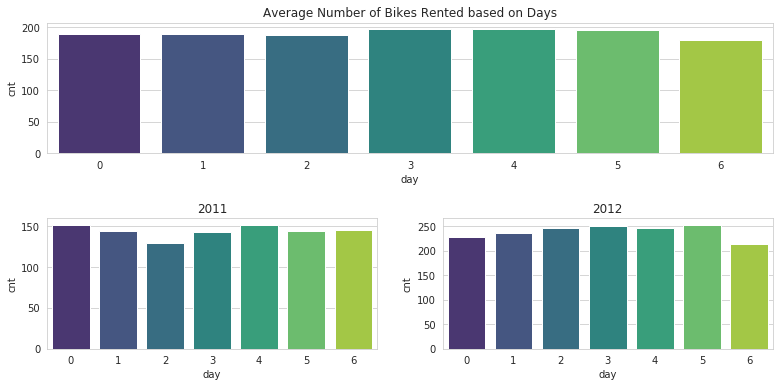

In [36]:
fig = plt.figure(figsize = [13, 6])
ax = fig.add_subplot(2, 2, (1,2))
sns.barplot(data = train.groupby('day').mean(),
            y = 'cnt',
            x = train.groupby('day').mean().index.astype('category'),
            palette = 'viridis')
ax.set_title('Average Number of Bikes Rented based on Days')


ax = fig.add_subplot(2, 2, 3)
sns.barplot(data = train[train['year'] == 2011].groupby('day').mean(),
            y = 'cnt',
            x = train.groupby('day').mean().index.astype('category'),
            palette = 'viridis')
ax.set_title('2011')

ax = fig.add_subplot(2, 2, 4)
sns.barplot(data = train[train['year'] == 2012].groupby('day').mean(),
            y = 'cnt',
            x = train.groupby('day').mean().index.astype('category'),
            palette = 'viridis')
plt.subplots_adjust(hspace = .5)
ax.set_title('2012')
#ax.title('Average Number of Bikes Rentedbased on Days')

Overall, on thursday to saturday people rented bikes more than any other days especially sunday. But if we look at each year, there are differences between 2011 and 2012

Text(0.5, 1.0, 'Average Number of Bikes Rented Everyday at Each Hour')

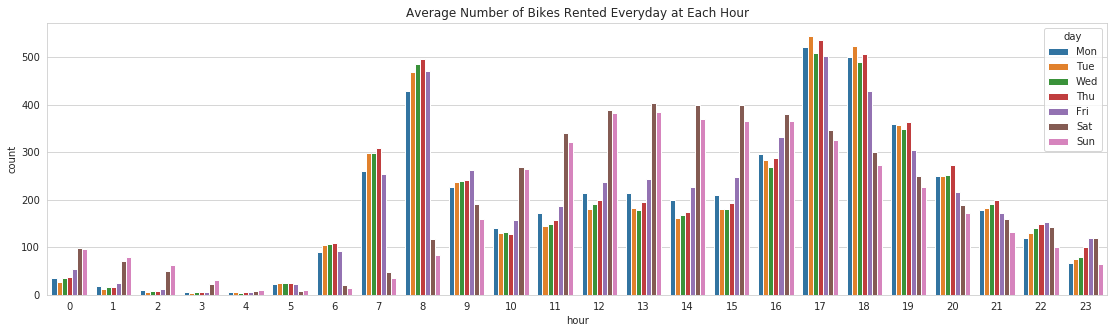

In [37]:
days = []
hours = []
bikes_count = []
day_dict = {0 : 'Mon',
            1 : 'Tue',
            2 : 'Wed',
            3 : 'Thu',
            4 : 'Fri',
            5 : 'Sat',
            6 : 'Sun'}
for day in range(7) :
    for hour in range(24) :
        days.append(day_dict[day])
        hours.append(hour)
        bikes_count.append(train[(train['day'] == day) & (train['hour'] == hour)]['cnt'].mean())
vis_df = pd.DataFrame({'day' : days,
                       'hour' : hours,
                       'count' : bikes_count})
vis_df['hour'] = vis_df['hour'].astype('category')
plt.figure(figsize = [19, 5])
sns.barplot(data = vis_df,
            y = 'count',
            x = 'hour',
            hue = 'day')
plt.title('Average Number of Bikes Rented Everyday at Each Hour')

The peaks amount of bikes rented for most of the days are at 8 am, 5 pm, and 6 pm. This is consistent with the previous plots that shows the same insight. 

However, the way people rented bikes on weekends is the opposite of what people did in weekdays. For example, at 2 pm the average amount of bikes rented reached the peak when it was either on saturday or sunday (weekend) while on weekdays it's significantly lower. On the other side, when there are lots of bikes rented on weekdays, it's significantly lower on weekends.

## Feature selection

In [38]:
train = train.drop(columns = ['holiday', 'weekday', 'datetime'])
test = test.drop(columns = ['holiday', 'weekday', 'datetime'])

Holiday and Weekday will not be used for the modeling phase

# 3. Cross-Val and Modelling

In [39]:
#Libraries
from prettytable import PrettyTable
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.base import BaseEstimator, ClassifierMixin

#Preprocessing libraries
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#Modelling libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

In [40]:
x_train, x_val, y_train, y_val = train_test_split(train.drop(columns = ['cnt']),
                                                  train[['cnt']],
                                                  train_size = 0.73,
                                                  random_state = 2)

The testing dataset are located at the last 2 weeks of each month. There are 2 possible ways to make predictions :
1. Create models at each month to predict each test set at each month
2. Treating the training set and the testing set as a whole. Only 1 model will be generated using the whole set of training set to predict the whole testing set

There are lots of categorical variabels obtained in the dataset, so for the modeling I'll use CatBoostRegressor because it has its own feature to transform categorical into numerical features.